In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
from collections import defaultdict
%matplotlib inline 

In [32]:
!pip install wordcloud

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [34]:
df = pd.read_csv('./amazon_jobs_dataset.csv')
print('dataset loaded')

dataset loaded


In [58]:
df.head(5)

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
62,62,Software Development Engineer – In-Memory Dist...,"CA, BC, Vancouver",2018-02-27,Our software developers build the next generat...,· Expert knowledge of one of the following pro...,· Experience in taking a lead role developing ...
63,63,Software Development Engineer – In-Memory Dist...,"CA, BC, Vancouver",2018-02-27,Our software developers build the next generat...,· Expert knowledge of one of the following pro...,· Experience in taking a lead role developing ...
64,64,Software Development Engineer – In-Memory Dist...,"CA, BC, Vancouver",2018-02-27,Our software developers build the next generat...,· Expert knowledge of one of the following pro...,· Experience in taking a lead role developing ...
101,101,Software Development Engineer- Efficiency,"CA, BC, Vancouver",2018-02-26,Have you ever ordered a product from Amazon an...,· At least 2+ years work experience in a relat...,· Experience taking a leading role in building...
183,183,Software Development Engineer,"CA, BC, Vancouver",2018-02-22,Are you an experienced software development en...,· Bachelor’s degree in Computer Science or rel...,· Proficiency in Java in a Linux/Unix environm...


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 62 to 3487
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                75 non-null     int64         
 1   Title                     75 non-null     object        
 2   location                  75 non-null     object        
 3   Posting_date              75 non-null     datetime64[ns]
 4   DESCRIPTION               72 non-null     object        
 5   BASIC QUALIFICATIONS      72 non-null     object        
 6   PREFERRED QUALIFICATIONS  72 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 4.7+ KB


In [61]:
#Filter by location
df = df[df['location'].str.contains('Vancouver')]

In [62]:
df = df[df['Title'].str.contains('Software Development Engineer')]

In [63]:
df.Posting_date = pd.to_datetime(df.Posting_date)

In [64]:
tmp = df.groupby([df.Posting_date.dt.year, df.Title]).sum().reset_index().set_index('Posting_date')

In [65]:
tmp = tmp.reset_index()

In [66]:
part1 = pd.DataFrame(tmp)

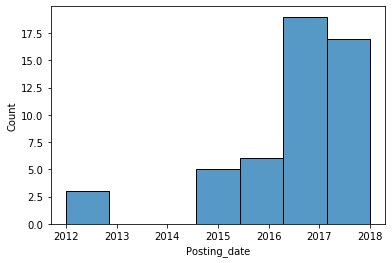

In [44]:
#Nombre de job chez AWS lors des années 2012 a 2018 (Données continues)
sns.histplot(data=part1, x="Posting_date")

In [96]:
#Generate worldcloud to see what comes up
textQualifications = df['BASIC QUALIFICATIONS'].values 

In [107]:
toDismiss = ['experience', "and", "with", "in", "to", "or", "a", "of", "related", "Ability", "that", "have", "such as", "at least"]

(-0.5, 799.5, 399.5, -0.5)

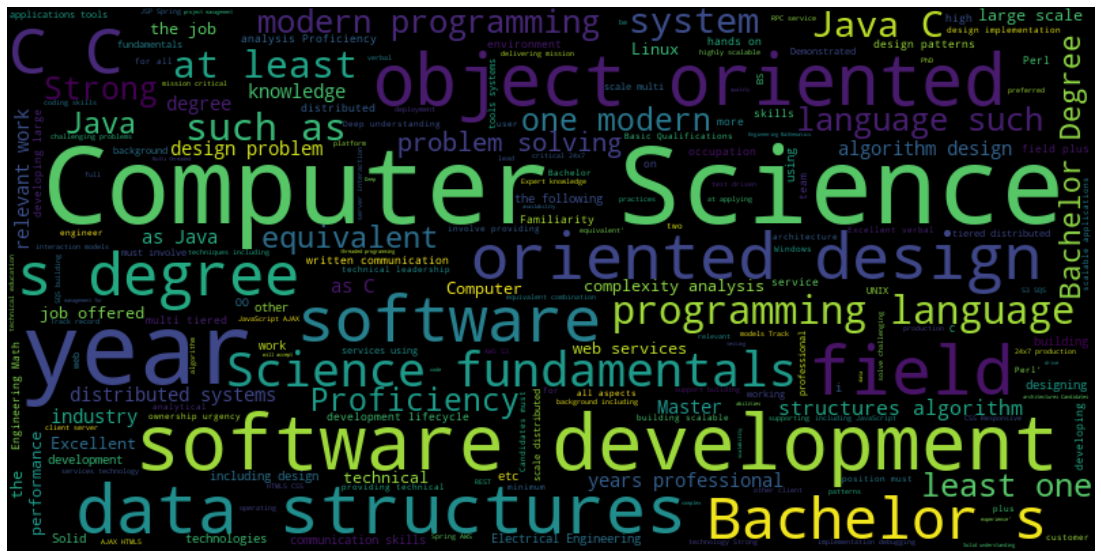

In [108]:
wordcloud = WordCloud(width=800, height=400, stopwords=toDismiss).generate(str(textQualifications))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [109]:
textBasic = df['BASIC QUALIFICATIONS'].values 

(-0.5, 1599.5, 799.5, -0.5)

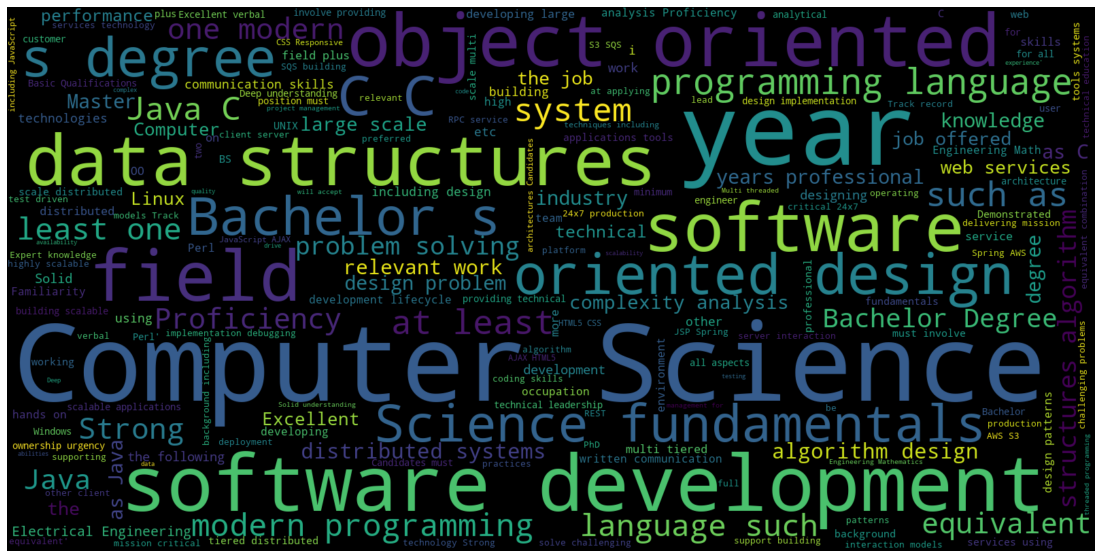

In [110]:
wordcloud = WordCloud(width=1600, height=800, stopwords=toDismiss).generate(str(textBasic))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [101]:
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

In [102]:
# get our BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns and and convert all of the values to a list
qualifications = df['BASIC QUALIFICATIONS'].tolist() + df['PREFERRED QUALIFICATIONS'].tolist()

# joining the list to a single string and lower case the letter
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower()

In [48]:
wordcount = dict((x , 0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1

In [49]:
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [50]:
# make a new dataframe from programming languages and their popularity
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1] # all items in the array, reversed

In [51]:
#Check data
df_popular_programming_lang

,Language,Popularity
17,Objectivec,0
16,Php,0
15,Pig,0
14,Cosmos,0
13,Matlab,0
12,Swift,0
11,Spark,1
10,Mysql,1
9,Mongodb,1
8,Hadoop,4


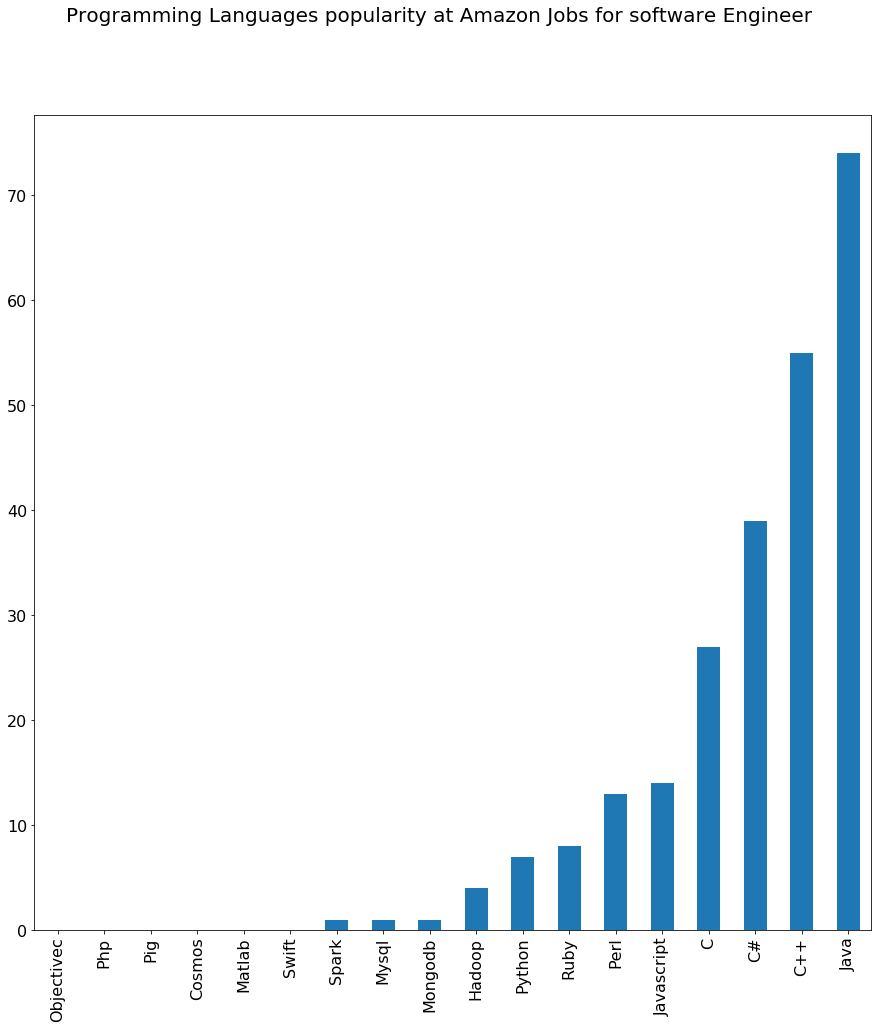

In [52]:
df_popular_programming_lang.plot.bar(x='Language',y='Popularity',figsize=(15,15), legend=False)

plt.suptitle("Programming Languages popularity at Amazon Jobs for software Engineer", fontsize=20)
# set xlabel to ""

plt.xlabel("")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [53]:
basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

In [54]:
years = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]) ', basic_qualifications_string):
     years[w] += 1

In [55]:
years = sorted(years.items(), key=lambda kv: kv[1], reverse=True)

In [56]:
df_years = pd.DataFrame(years,columns=['Years of experience','Popularity'])
df_years = df_years[::-1] 

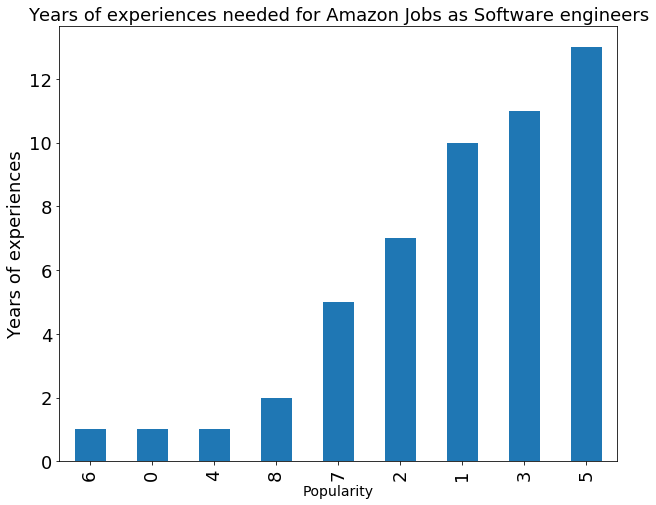

In [57]:
df_years.plot.bar(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False,stacked=True)
# add a suptitle
plt.title("Years of experiences needed for Amazon Jobs as Software engineers", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Years of experiences",fontsize=18)
# change xticks fontsize to 14
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()